In [1]:
import numpy as np
from scipy.spatial import distance
import random
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import time
import json
from scipy.cluster import hierarchy
from scipy.optimize import linear_sum_assignment


In [2]:
# this code enables you to import the data and plot it. If you wish to generate the computation times from beginning. you can go ahead and run the codes. 

with open("../../data/Agglomerative_support.txt", "r") as file:
    data = file.read()
x_axis = [10,20,40,80,100,150,300]
# Convert the string from the file into a list of lists
agglomerative_support = eval(data)

len(agglomerative_support)

7

In [3]:
# this code enables you to import the data and plot it. If you wish to generate the computation times from beginning. you can go ahead and run the codes. 

with open("../../data/Agglomerative_support.txt", "r") as file:
    data = file.read()
x_axis = [10,20,40,80,100,150,300]
# Convert the string from the file into a list of lists
agglomerative_support = eval(data)

len(agglomerative_support)

7

In [4]:
with open("../../data/Agglomerative_support.txt", "r") as file:
    data = file.read()
x_axis = [10,20,40,80,100,150,300]
# Convert the string from the file into a list of lists
agglomerative_support = eval(data)

In [5]:
with open("../../data/Kmeans_support.txt", "r") as file:
    data = file.read()
x_axis = [10,20,40,80,100,150,300]
# Convert the string from the file into a list of lists
Kmeans_support = eval(data)

In [6]:
with open("../../data/Agglomerative_systems.txt", "r") as file:
    data = file.read()
x_axis = [10,20,40,80,100,150,300]
# Convert the string from the file into a list of lists
agglomerative_systems = eval(data)

In [7]:
with open("../../data/Kmeans_systems.txt", "r") as file:
    data = file.read()
x_axis = [10,20,40,80,100,150,300]
# Convert the string from the file into a list of lists
Kmeans_systems = eval(data)

# Plotting means 

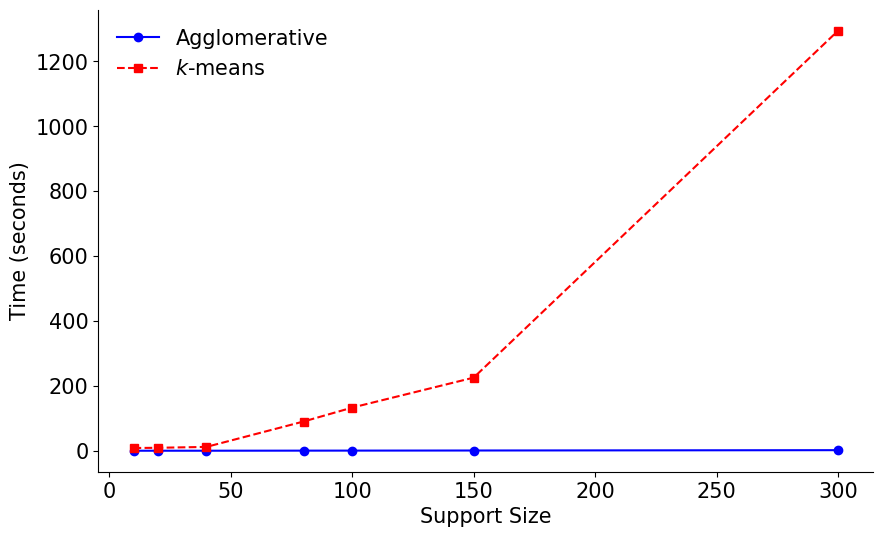

In [8]:
def plot_means(list_of_lists1, list_of_lists2, indices):
    # Calculate means for each inner list in both list_of_lists1 and list_of_lists2
    means_list1 = [sum(inner_list) / len(inner_list) if len(inner_list) > 0 else 0 for inner_list in list_of_lists1]
    means_list2 = [sum(inner_list) / len(inner_list) if len(inner_list) > 0 else 0 for inner_list in list_of_lists2]

    # Ensure indices match the length of means_list1 and means_list2, or adjust accordingly
    indices = indices[:min(len(means_list1), len(means_list2))]

    # Plot the means for both lists of lists
    plt.figure(figsize=(10, 6))
    
    # Plotting means for first list of lists
    plt.plot(indices, means_list1[:len(indices)], marker='o', linestyle='-', label='Agglomerative', color='blue')
    
    # Plotting means for second list of lists
    plt.plot(indices, means_list2[:len(indices)], marker='s', linestyle='--', label=r'$k$-means', color='red')
    
    # Highlighting or labeling specific indices
    for idx in indices:
        if idx < len(means_list1):
            plt.scatter(idx, means_list1[indices.index(idx)], color='green', s=100, zorder=5, label=f'Index {idx} in List 1')
        if idx < len(means_list2):
            plt.scatter(idx, means_list2[indices.index(idx)], color='orange', s=100, zorder=5, label=f'Index {idx} in List 2')
    
    # Customizing the plot
    plt.xlabel('Support Size', fontsize=15)
    plt.ylabel('Time (seconds)', fontsize=15)
    plt.legend(loc='best', frameon=False, fontsize=15)

    # Remove the right and upper spines (borders)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Set the fontsize for xticks and yticks
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Save the figure
    plt.savefig(r'../../results/kmeans_and_agglomerative_support.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()


# Example usage
list_of_lists1 = agglomerative_support
list_of_lists2 = Kmeans_support
indices = [10,20,40,80,100,150,300] # Indices to label

plot_means(list_of_lists1, list_of_lists2, indices)

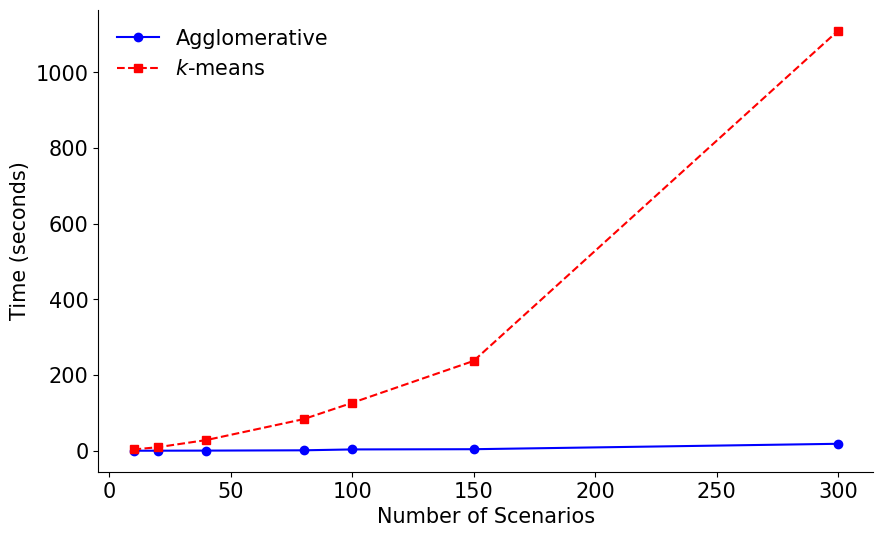

In [9]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_means(list_of_lists1, list_of_lists2, indices):
    # Calculate means for each inner list in both list_of_lists1 and list_of_lists2
    means_list1 = [sum(inner_list) / len(inner_list) if len(inner_list) > 0 else 0 for inner_list in list_of_lists1]
    means_list2 = [sum(inner_list) / len(inner_list) if len(inner_list) > 0 else 0 for inner_list in list_of_lists2]

    # Ensure indices match the length of means_list1 and means_list2, or adjust accordingly
    indices = indices[:min(len(means_list1), len(means_list2))]

    # Plot the means for both lists of lists
    plt.figure(figsize=(10, 6))
    
    # Plotting means for first list of lists
    plt.plot(indices, means_list1[:len(indices)], marker='o', linestyle='-', label='Agglomerative', color='blue')
    
    # Plotting means for second list of lists
    plt.plot(indices, means_list2[:len(indices)], marker='s', linestyle='--', label=r'$k$-means', color='red')
    
    # Highlighting or labeling specific indices
    for idx in indices:
        if idx < len(means_list1):
            plt.scatter(idx, means_list1[indices.index(idx)], color='green', s=100, zorder=5, label=f'Index {idx} in List 1')
        if idx < len(means_list2):
            plt.scatter(idx, means_list2[indices.index(idx)], color='orange', s=100, zorder=5, label=f'Index {idx} in List 2')
    
    # Customizing the plot
    plt.xlabel('Number of Scenarios', fontsize=15)
    plt.ylabel('Time (seconds)', fontsize=15)
    plt.legend(loc='best', frameon=False, fontsize=15)

    # Remove the right and upper spines (borders)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Set the fontsize for xticks and yticks
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Save the figure
    plt.savefig(r'../../results/kmeans_and_agglomerative_systems.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()


# Example usage
list_of_lists1 = agglomerative_systems
list_of_lists2 = Kmeans_systems
indices = [10,20,40,80,100,150,300] # Indices to label

plot_means(list_of_lists1, list_of_lists2, indices)
